In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sys
import pandas as pd

In [11]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [12]:
y.shape

(150,)

In [13]:
np.unique(y)

array([0, 1, 2])

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
m = LogisticRegression()
m.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

# Model

In [16]:
class MyLogisticRegression:

    def __init__(
        self, lr=0.1, num_iter=1_000_000, verbose=False, multi_class=False
    ):
        self.lr = lr
        self.num_iter = num_iter
        self.verbose = verbose
        self.multi_class = multi_class
        self.weights = None
        self.bias = None
        self.x = None
        self.y = None
        self.classes_ = None
        self.m = None
        self.n = None
        self.losses = []
        self.accuracies = []

    def softmax(self, x):
        e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return e_x / e_x.sum(axis=1, keepdims=True)

    def gradient_descent(self):
        y_hat = self.predict(self.x)
        dw = (1 / self.m) * np.dot(self.x.T, (y_hat - self.y))
        db = (1 / self.m) * np.sum(y_hat - self.y)
        self.weights -= self.lr * dw
        self.bias -= self.lr * db

    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        predication = 1.0 / (1.0 + np.exp(-z))
        return self.softmax(predication) if self.multi_class else predication

    def plot(self):
        plt.plot(self.losses)
        plt.plot(self.accuracies)
        plt.xlabel("Number of iterations")
        plt.ylabel("Loss")
        plt.legend(["Loss", "Accuracy"])
        plt.show()

    def loss(self):
        y_hat = self.predict(self.x)
        self.losses.append(
            -np.mean(
                self.y * np.log(y_hat + sys.float_info.min)
                + (1 - self.y) * np.log(1 - y_hat + sys.float_info.min)
            )
        )
        return self.losses[-1]

    def accuracy(self):
        y_hat = self.predict(self.x)
        acc = np.mean(y_hat.argmax(axis=1) == self.y.argmax(axis=1)) if self.multi_class else np.mean(y_hat.round() == self.y)
        self.accuracies.append(acc)

    def fit(self, x, y):
        self.x = x
        self.y = y
        best_loss = sys.float_info.max
        patience = 5
        self.m, self.n = x.shape
        if self.multi_class:
            self.classes_ = np.unique(self.y)
            self.y = pd.get_dummies(self.y).to_numpy()
            self.weights = (
                np.random.rand(self.n, len(self.classes_))
                if self.weights is None
                else self.weights
            )
            self.bias = (
                np.random.rand(len(self.classes_)) if self.bias is None else self.bias
            )
        else:
            self.weights = np.random.rand(self.n) if self.weights is None else self.weights
            self.bias = np.random.rand() if self.bias is None else self.bias
        for _ in range(self.num_iter):
            self.gradient_descent()
            self.loss()
            self.accuracy()
            if self.losses[-1] < best_loss:
                best_loss = self.losses[-1]
                patience = 5
            else:
                patience -= 1
                if patience == 0:
                    break
            if self.verbose:
                print(f"\tLoss: {self.losses[-1]}")
                print(f"\tAccuracy: {self.accuracies[-1]}")
        print(f"\nFinal Loss: {self.losses[-1]}")
        print(f"Final Accuracy: {self.accuracies[-1]}")

    def eval(self, x, y):
        self.x = x
        self.y = y
        if self.multi_class:
            self.y = pd.get_dummies(self.y).to_numpy()
        self.accuracy()
        print(f"Accuracy: {self.accuracies[-1]}")

In [17]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [18]:
np.unique(y_train)

array([0, 1, 2])

In [19]:
model = MyLogisticRegression(multi_class=True)

# Standardization

In [20]:
x_train = (x_train - x_train.mean()) / x_train.std()
x_test = (x_test - x_test.mean()) / x_test.std()

# Train

In [21]:
model.fit(x_train, y_train)


Final Loss: 0.47092098503815644
Final Accuracy: 0.6571428571428571


C:\Users\moham\AppData\Local\Temp\ipykernel_8180\3285578130.py:33: RuntimeWarning: overflow encountered in exp
  predication = 1.0 / (1.0 + np.exp(-z))


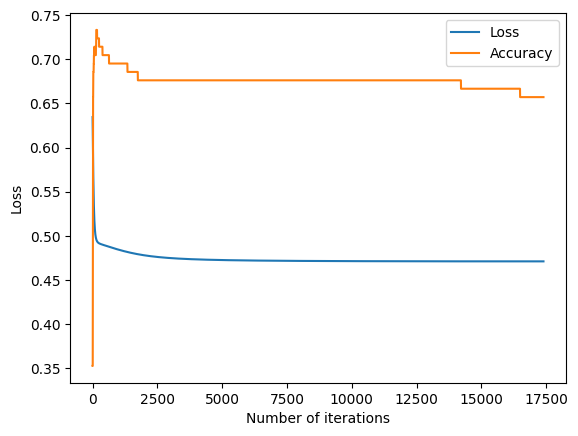

In [22]:
model.plot()

In [23]:
model.eval(x_test, y_test)

Accuracy: 0.7111111111111111


C:\Users\moham\AppData\Local\Temp\ipykernel_8180\3285578130.py:33: RuntimeWarning: overflow encountered in exp
  predication = 1.0 / (1.0 + np.exp(-z))


# Group samples of class 2 and class 3 together to form new class (Class II)


In [24]:
model = MyLogisticRegression()

In [25]:
model.fit(x_train, np.where(y_train == 2, 1, y_train))


Final Loss: 5.6496139216999354e-05
Final Accuracy: 1.0


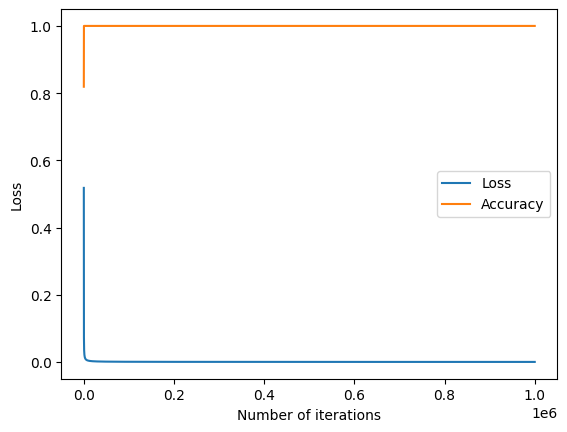

In [26]:
model.plot()

In [27]:
model.eval(x_test, np.where(y_test == 2, 1, y_test))

Accuracy: 1.0
